# EC_01_Volcanic_activity_detection_and_noise_characterization_using_machine learning 


## Author(s)


- Author1 = {"name": "Myles Mason", "affiliation": "Virginia Tech", "email": "mylesm18@vt.edu", "orcid": "0000-0002-8811-8294"}
- Author2 = {"name": "John Wenskovitch", "affiliation": "Virginia Tech", "email": "jw87@vt.edu", "orcid": "0000-0002-0573-6442"}
- Author3 = {"name": "D. Sarah Stamps", "affiliation": "Virginia Tech", "email": "dstamps@vt.edu","orcid": "0000-0002-3531-1752"}
- Author4 = {"name": "Joshua Robert Jones", "affiliation": "Virginia Tech", "email": "joshj55@vt.edu", "orcid": "0000-0002-6078-4287"}
- Author5 = {"name": "Mike Dye", "affiliation": "University of Colorado Boulder", "email": "mike@mikedye.com", "orcid": " 0000-0003-2065-870X"}


    

## Purpose

This Jupyter notebook aims to explore methods towards characterizing noise and eventually predicting volcanic activity for Ol Doinyo Lengai (a volcano in Tanzania) with machine learning. Machine learning is a powerful tool that enables the automatization of complex mathematical and analytical models. In the case of this Jupyter notebook, the components are height, latitude, and longitude. The predicted component values are the next heights. This project uses Global Navigation Satellite System  (GNSS) data from the EarthCube CHORDS portal TZVOLCANO (Stamps et al. 2016), which is the online interface for obtaining open-access real-time positioning data collected around Ol Doinyo Lengai (http://tzvolcano.chordsrt.com).

## Technical contributions
- The training of the models and anaylze uses basic Linear Albera and stastics 
- The main libraries used (numpy and pandas) are both libraries for data manipulation and linear algebra 
- The CHORDS site linked above is the location of the data and the interface of CHORDS 
- Implementation of Linear Regression for prediction on time series data

## Methodology
- Data collection
- Data pre processing
- Input data for Linear Regression model
- Increase sample size of inputs for the model
- Compare predictions to actual data




## Results
Describe and comment on the most important results. Include images and URLs as necessary. 

## Funding

- Award1 = {"agency": "National Science Foundation EarthCube Program", "award_code": "1639554", "award_URL": "https://www.nsf.gov/awardsearch/showAward?AWD_ID=1639554&HistoricalAwards=false"}
- Award2 = {"agency": "Virginia Tech Academy of Integrated Sciences Hamlett Undergraduate Research Award", "award_code": "44672", "award_URL": "award_URL"}

## Keywords
Include up to 5 keywords, using the template below.

keywords=["tzDF", "LinearRegression", "Concat", "Transpose","Mean Squared Error"(MSE)]

## Citation
GeÌ ron, Aureì lien. 2019. Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. 2nd ed. CA 95472: O’Reilly.

## Suggested next steps
Next steps for this notebook will be increasing the inputs for the prediction model. More anaylsis on the noise will be a crucial point in the next step for further volcanic activity prediciton. Specifically generating sysnthetic data that will mimic volcanic activity.
## Acknowledgements 
- Virginia Tech Department of Geosciences 
- Alice and Luther Hamlet

# Setup

## Library import


In [1]:
# Data manipulation
import pandas as pd
import json
import numpy as np
from datetime import datetime as dt

# Visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



## Local library import
Import all the required local libraries.


In [2]:
# Include local library paths
import sys
# sys.path.append('path/to/local/lib') # uncomment and fill to import local libraries

# Import local libraries

# Parameter definitions
-tzDF: intial dataframe contains 12/06/2020 data 
-tzDF_two: secondary dataframe contains 04/16/2021 data
-one_Through_Twenty: array of values in tzDF["measuremnts_height"] used for prediction
-two_Through_Twenty_One:array of values in tzDF["measuremnts_height"] used for prediction
-three_Through_Twenty_Two: array of values in tzDF["measuremnts_height"] used for prediction
-four_Through_Twenty_Four: array of values in tzDF["measuremnts_height"] used for prediction
-result_DF: data frame of all of the above arrays combined 
-december_Series_X: inputed height for 12/16/2020 data for Linear Regression  
-december_Series_Y: target height data for 12/16/2020
-april_Series_X: inputed height data for 04/16/2021
-april_Series_Y: target height data for 04/16/2021
april_Prediction: Predicted values from the two days





# Data import


The CHORDS notebook portal is where the data is acessed.

In [3]:
#Import for JSON files for manipulation
''' Both files are station one, but the first date is December 16,2020
    while the second date is April 16 2021.
'''
with open('OLO1_12_16_20.geojson', 'r', encoding="utf-8") as infile:
    tzList = json.load(infile)

with open('OLO1_4_16_21.geojson', 'r', encoding="utf-8") as infile:
    tz2List = json.load(infile)

# Data processing and analysis


In [4]:
#Convert both JSON's into  a partially-flattened pandas DataFrame   
tzDF =  pd.json_normalize(tzList["features"][0]["properties"]["data"], sep='_')
tz2DF =  pd.json_normalize(tzList["features"][0]["properties"]["data"], sep='_')
#Overview of numerical elements of the data
print(tzDF.describe())
tzDF

       measurements_lat  measurements_height  measurements_lon
count      5.990000e+03          5990.000000      5.990000e+03
mean       2.734205e+00           988.153415      3.595022e+01
std        2.869056e-13             0.020116      1.547341e-07
min        2.734205e+00           988.095000      3.595022e+01
25%        2.734205e+00           988.139000      3.595022e+01
50%        2.734205e+00           988.152000      3.595022e+01
75%        2.734205e+00           988.167000      3.595022e+01
max        2.734205e+00           988.226000      3.595022e+01


,time,test,measurements_lat,measurements_height,measurements_lon
0,2020-12-16T05:08:18Z,false,2.734205,988.203,35.950217
1,2020-12-16T05:08:19Z,false,2.734205,988.206,35.950217
2,2020-12-16T05:08:20Z,false,2.734205,988.214,35.950217
3,2020-12-16T05:08:21Z,false,2.734205,988.226,35.950217
4,2020-12-16T05:24:41Z,false,2.734205,988.199,35.950217
...,...,...,...,...,...
5985,2020-12-17T04:48:44Z,false,2.734205,988.139,35.950217
5986,2020-12-17T04:53:51Z,false,2.734205,988.147,35.950217
5987,2020-12-17T04:53:52Z,false,2.734205,988.132,35.950217
5988,2020-12-17T04:55:09Z,false,2.734205,988.137,35.950217


From the .describe call looking at our data frame there does not seem to be a lot of varaition in columns measurements_lat and measurements_lon. The reasoning of choosing to explore the measurements_height column in this notebook is beacause of its variation. From viewing the dataframe the time column is in a time series form with extra seperator varibles "T" and "Z" in the next two cells we will convert the timestamp column into an integer form for easy manipulation.

 Function to convert timestamp coulmn of tzDF and tz2DF from timeseries to an integer for easy manipulation.

In [5]:
def timeconvertfunc(timestamp):
 #The format of tzDF["measurments_height] is in string form and timeseries so this method make it an integer"
  ts = pd.Timestamp(timestamp, tz=None).to_pydatetime()
  ts = 3600*ts.hour + 60*ts.minute + ts.second

  return ts
#Applying above method to the two data frames
tzDF["timeconvert"] = tzDF["time"].apply(timeconvertfunc)
tz2DF["timeconvert"] = tzDF["time"].apply(timeconvertfunc)

# Visulization of basic stastics from measurements_height and linear regression

In the code block below the four series objects are partions of the measurments_height column in the tzDF dataframe. We create these partions to feed into a Linear Regression model for predictions.

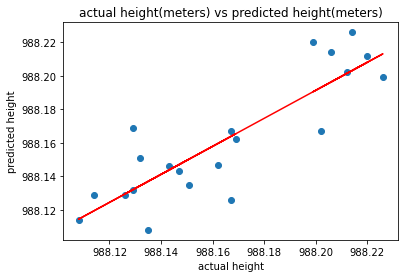

This is the b value [[0.83655979]]
This is the m value [161.50298089]
This is the R^2 0.7395011512205776


In [6]:
#From the first
one_Through_Twenty = tzDF["measurements_height"].loc[1:21].values.reshape(-1,1)
two_Through_Twenty_One= tzDF["measurements_height"].loc[2:22].values.reshape(-1,1)
three_Through_Twenty_Two =tzDF["measurements_height"].loc[3:23].values.reshape(-1,1)
four_Through_Twenty_Four = tzDF["measurements_height"].loc[4:24].values.reshape(-1,1)

#Linear Regression model on columns 1-20 and 2-21

lm = LinearRegression()
lm.fit(one_Through_Twenty ,two_Through_Twenty_One)
y_pred = lm.predict(one_Through_Twenty)
plt.xlabel("actual height")
plt.ylabel("predicted height")
plt.title("actual height(meters) vs predicted height(meters)")
plt.scatter(one_Through_Twenty,two_Through_Twenty_One)
plt.plot(one_Through_Twenty,y_pred,color="red")
plt.show()

print("This is the b value",lm.coef_,)

print("This is the m value",lm.intercept_)
print("This is the R^2",lm.score(one_Through_Twenty,two_Through_Twenty_One))



From the above model with using the first through twentith column and second through twenty second column we yeild a Coefficent of Correlation (R^2) value of about 0.73 which shows positive correlation between the two inputs. So about 37% of varition is residing in the residual.

## two_through_Twenty_One and three_through_Twenty_Two

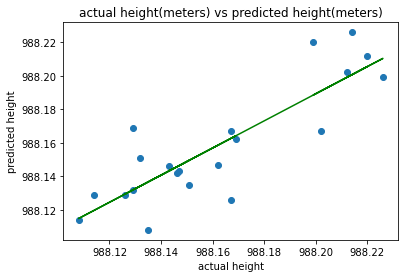

This is the b value [[0.81020583]]
This is the m value [187.5439221]
This is the R^2 0.7256865812125708


In [7]:

lm = LinearRegression()
lm.fit(two_Through_Twenty_One ,three_Through_Twenty_Two)
y_pred1 = lm.predict(two_Through_Twenty_One)
plt.scatter(two_Through_Twenty_One,three_Through_Twenty_Two)
plt.plot(two_Through_Twenty_One,y_pred1,color="green")
plt.xlabel("actual height")
plt.ylabel("predicted height")
plt.title("actual height(meters) vs predicted height(meters)")
plt.show()
print("This is the b value",lm.coef_,)
print("This is the m value",lm.intercept_)
print("This is the R^2",lm.score(two_Through_Twenty_One,three_Through_Twenty_Two))

From the above model with using the first through twentith column and second through twenty second column we yeild a Coefficent of Correlation (R^2) value of about 0.72 which shows positive correlation between the two inputs. So about 38% of varition is residing in the residual.

# Linear Regression from single day

The following code chunk uses  Linear Regression( specifically with rows of height measurmet one_Through_Twenty,two_Through_Twenty_One, and 
three_Through_Twenty_Two. The dataframe used for the model is tzDF and we display the predicted values versus actual values.

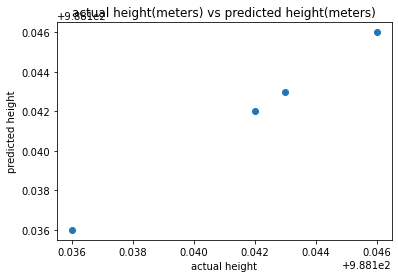

measurements_height    0.0
measurements_height    0.0
measurements_height    0.0
measurements_height    0.0
Name: 21, dtype: float64


In [8]:
#Set up series object for partions in the dataframe
one_Through_Twenty = tzDF["measurements_height"].loc[1:21]
two_Through_Twenty_One= tzDF["measurements_height"].loc[2:22]
three_Through_Twenty_Two =tzDF["measurements_height"].loc[3:23]
four_Through_Twenty_Four = tzDF["measurements_height"].loc[4:24]

#Renaming the series objects
one_Through_Twenty.rename({"measurements_height":"w"},axis =1,inplace=True)
two_Through_Twenty_One.rename({"measurements_height":"x"},axis =1,inplace=True)
three_Through_Twenty_Two.rename({"measurements_height":"y"},axis =1,inplace=True)
four_Through_Twenty_Four.rename({"measurements_height":"z"},axis =1,inplace=True)

#Concating the series objects to one dataframe, result_DF
result_DF = pd.concat([one_Through_Twenty,two_Through_Twenty_One,three_Through_Twenty_Two,four_Through_Twenty_Four],axis=1)
result_DF

#Modefying dataframe by shifting the coulmns up 
result_DF.iloc[:,1] = result_DF.iloc[:,1].shift(-1)
result_DF.iloc[:,2] = result_DF.iloc[:,2].shift(-2)
result_DF.iloc[:,3] = result_DF.iloc[:,3].shift(-3)

#Aligning all coulmns of the data frame together
result_DF = result_DF.dropna()
result_DF = result_DF.transpose()
result_DF

#Linear Regression on all rows and 1-19 coulmns 
lm = LinearRegression()
x = result_DF.iloc[:,0:20]
y = result_DF.iloc[:,20]
lm.fit(x,y)
y_pred1 = lm.predict(x)
plt.scatter(y,y_pred1)
plt.xlabel("actual height")
plt.ylabel("predicted height")
plt.title("actual height(meters) vs predicted height(meters)")
plt.show()
#print("This is the b value",lm.coef_,)
#print("This is the m value",lm.intercept_)
#print("This is the R^2",lm.score(x,y))
print(y-y_pred1)


From viewing the above graph all points are prefectly predicted as the values overlap graphically and the difference in height is zero. From viewing our results we are gaining perfect accuracy of prediciton we will now increase the sample size of the data.

## Prediction of one point

We 

Error of model is [-0.01270647]


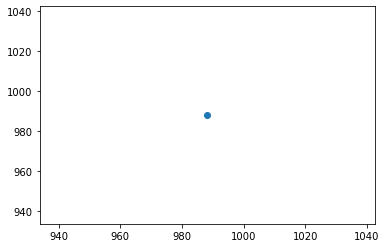

In [9]:
#Training the first through third rows and all columns
train_x = x.iloc[0:3,:]
train_y = y.iloc[0:3]

#Set up for test data
test_x = x.iloc[3,:]
test_y = y.iloc[3]
test_x = test_x.values.reshape(1,-1)

#Fitting the model 
lm.fit(train_x,train_y)
y_pred2 = lm.predict(test_x)
plt.scatter(test_y,y_pred2)

print("Error of model is",test_y-y_pred2)

# Method to increase sample size for model

Method below takes in a dataframe goes into measurment height and get the first through nintenth values in the height dataframe. The first and nintenth value are increased by one a thousand times. The Data frame is transposed made into coulmns then added to an empty list so that it can be concated into a dataframe.

In [10]:
#Making an empty list to store coulmn values
empty_list = []
def make_list(DataFrame):
    i = 0
    for i in range(1000):  
        change = tzDF["measurements_height"].iloc[i+1:i+21].to_frame().transpose()
        #Names of the columns
        change.columns = ["history_1","history_2","history_3","history_4","history_5",
                          "history_6","history_7","history_8","history_9","history_10",
                          "history_11","history_12","history_13","history_14","history_15",
                          "history_16","history_17","history_18","history_19","history_20"]
        change.index = [i]
        empty_list.append(change)
    return empty_list
# List of all columns values 
tzDF_list = make_list(tzDF["measurements_height"])
tzDF_two_list = make_list(tz2DF["measurements_height"])

#List iteration to combine all elements in list
finalDF = pd.concat([m for m in tzDF_list])
finalDF_two =  pd.concat([m for m in tzDF_two_list])
finalDF_two


,history_1,history_2,history_3,history_4,history_5,history_6,history_7,history_8,history_9,history_10,history_11,history_12,history_13,history_14,history_15,history_16,history_17,history_18,history_19,history_20
0,988.206,988.214,988.226,988.199,988.220,988.212,988.202,988.167,988.167,988.126,988.129,988.132,988.151,988.135,988.108,988.114,988.129,988.169,988.162,988.147
1,988.214,988.226,988.199,988.220,988.212,988.202,988.167,988.167,988.126,988.129,988.132,988.151,988.135,988.108,988.114,988.129,988.169,988.162,988.147,988.143
2,988.226,988.199,988.220,988.212,988.202,988.167,988.167,988.126,988.129,988.132,988.151,988.135,988.108,988.114,988.129,988.169,988.162,988.147,988.143,988.146
3,988.199,988.220,988.212,988.202,988.167,988.167,988.126,988.129,988.132,988.151,988.135,988.108,988.114,988.129,988.169,988.162,988.147,988.143,988.146,988.142
4,988.220,988.212,988.202,988.167,988.167,988.126,988.129,988.132,988.151,988.135,988.108,988.114,988.129,988.169,988.162,988.147,988.143,988.146,988.142,988.136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,988.100,988.106,988.131,988.121,988.129,988.129,988.146,988.148,988.131,988.130,988.145,988.112,988.127,988.140,988.114,988.122,988.151,988.164,988.140,988.143
996,988.106,988.131,988.121,988.129,988.129,988.146,988.148,988.131,988.130,988.145,988.112,988.127,988.140,988.114,988.122,988.151,988.164,988.140,988.143,988.146
997,988.131,988.121,988.129,988.129,988.146,988.148,988.131,988.130,988.145,988.112,988.127,988.140,988.114,988.122,988.151,988.164,988.140,988.143,988.146,988.132
998,988.121,988.129,988.129,988.146,988.148,988.131,988.130,988.145,988.112,988.127,988.140,988.114,988.122,988.151,988.164,988.140,988.143,988.146,988.132,988.133


# Increased data points for linear regression

Below we will take the freshly made data frame finalDF with 200 rows x 20 columns, put the data into a linear regression utilizing the train test split module from the sci kit library. The test sizes of 35, 55, and 75 are used for variability. The x is all of the rows in the new dataframe and columns 1-19 while the y or output is all of the rows and the 19th column that we are predicting.

# 35% Test Data demensration

-0.000229563882718529


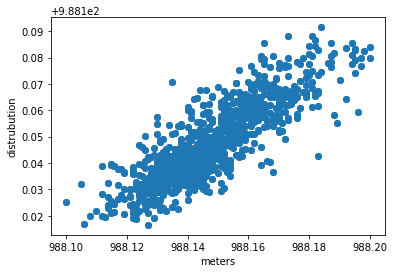

In [11]:
# 
input_Data = finalDF.iloc[:,0:19]
target_Data = finalDF.iloc[:,19]

lm.fit(input_Data,target_Data)
y_pred1 = lm.predict(input_Data)
plt.scatter(target_Data,y_pred1)
plt.xlabel("meters")
plt.ylabel("distrubution")
plt.scatter
# x axis is actual height and y is what lm model is predicting in scatter
X_train, X_test, y_train, y_test = train_test_split(input_Data, target_Data, test_size=0.35,random_state=50)

lm = LinearRegression()

model = lm.fit(X_train,y_train)
prediction = lm.predict(X_test)

#Series of the difference of the test the leng
error_Series = y_test-prediction

#average
average_Difference = sum(error_Series/len(error_Series))
#print(np.corrcoef(y_test,prediction))
print(average_Difference)


In the above cell when y_test-y_prediciton we get an average difference of -0.000229563882718529 from the model.

# 55% Test Data demenstration

-0.00030778063659289


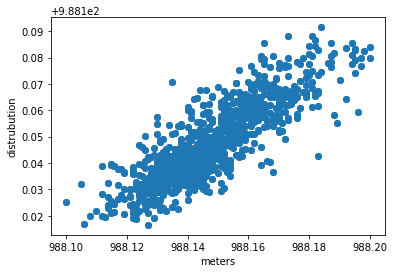

In [12]:
# 
input_Data = finalDF.iloc[:,0:19]
target_Data = finalDF.iloc[:,19]

lm.fit(input_Data,target_Data)
y_pred1 = lm.predict(input_Data)
plt.scatter(target_Data,y_pred1)
plt.xlabel("meters")
plt.ylabel("distrubution")
plt.scatter
# x axis is actual height and y is what lm model is predicting in scatter
X_train, X_test, y_train, y_test = train_test_split(input_Data, target_Data, test_size=0.55,random_state=50)

lm = LinearRegression()

model = lm.fit(X_train,y_train)
prediction = lm.predict(X_test)

#Series of the difference of the test the leng
error_Series = y_test-prediction

#average
average_Difference = sum(error_Series/len(error_Series))
#print(np.corrcoef(y_test,prediction))
print(average_Difference)


# 75% Test Data demenstration

-0.00010741432729476694


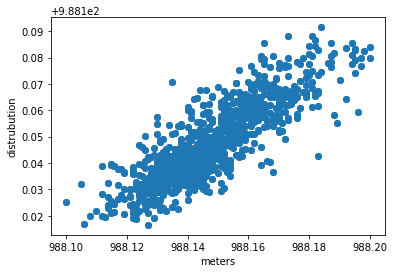

In [13]:
# 
input_Data = finalDF.iloc[:,0:19]
target_Data = finalDF.iloc[:,19]

lm.fit(input_Data,target_Data)
y_pred1 = lm.predict(input_Data)
plt.scatter(target_Data,y_pred1)
plt.xlabel("meters")
plt.ylabel("distrubution")
plt.scatter
# x axis is actual height and y is what lm model is predicting in scatter
X_train, X_test, y_train, y_test = train_test_split(input_Data, target_Data, test_size=0.75,random_state=50)

lm = LinearRegression()

model = lm.fit(X_train,y_train)
prediction = lm.predict(X_test)

#Series of the difference of the test the leng
error_Series = y_test-prediction

#average
average_Difference = sum(error_Series/len(error_Series))
#print(np.corrcoef(y_test,prediction))
print(average_Difference)


# Use one day's data to predict a different days data

#change 
The demenstations below utilize the second dataframe now named finalDF_two the December 16, 2020 dates data will be trained to predict the April 17,2020 dates data. The test size increases by ten percent in the for the range of 20-90 for varaibility. We will be using the Mean Squared value the value that shows the error for linear regression so we can view the accruacy of the model.

# Prediction from 20% test size data

In the cell below december_Series_X and decemeber_Series_Y will be the data that is used to train the model. April_Series_X and april_Series_Y will be the different day and data that we predict it points from. We will display a historgram to view the error distrbution between the actual and predicted data as well as 

In [14]:

december_Series_X  = finalDF.iloc[:,0:19]
december_Series_Y = finalDF.iloc[:,19]
april_Series_X  = finalDF_two.iloc[:,0:19]
april_Series_Y = finalDF_two.iloc[:,19]

lm.fit(m,december_Series_Y)
y_pred1 = lm.predict(december_Series_X)
#plt.scatter(n,y_pred1)

#train_test_split_module
X_train, X_test, y_train, y_test = train_test_split(december_Series_X , december_Series_Y, test_size=0.20,random_state=50)
model = lm.fit(X_train,y_train)
model.intercept_
model.coef_





#setting the prediciton variable 

april_Prediction = model.predict(april_Series_X )

#Distrubution of Errors pred vs actual
plt.hist(april_Prediction-april_Series_Y,bins = 50)
plt.xlabel("meters")
plt.ylabel("distrubution")
plt.title("Distrbution of predicted minus actual(m)")
plt.show()

#Displaying Mean Squared Error
twenty_MSE = mean_squared_error(april_Series_Y,april_Prediction)
print("The mean squared error for this model is",twenty_MSE,"%")

NameError: name 'm' is not defined

In the above cell the hitsogram displyaed displays the error from the prediciton minus the series. Most of the distrbution of the data is centered around zero displaying the performance of the model. The MSE is extremly low showing the accuracy of the model.

# Prediction from 30% test size data

In the cell below our we will be inputting in 30% test data 

In [ ]:

december_Series_X  = finalDF.iloc[:,0:19]
december_Series_Y = finalDF.iloc[:,19]
april_Series_X  = finalDF_two.iloc[:,0:19]
april_Series_Y = finalDF_two.iloc[:,19]

lm.fit(m,december_Series_Y)
y_pred1 = lm.predict(december_Series_X)
#plt.scatter(n,y_pred1)

#train_test_split_module
X_train, X_test, y_train, y_test = train_test_split(december_Series_X , december_Series_Y, test_size=0.30,random_state=50)
model = lm.fit(X_train,y_train)
model.intercept_
model.coef_





#setting the prediciton variable 

april_Prediction = model.predict(april_Series_X )

#Distrubution of Errors pred vs actual
plt.hist(april_Prediction-april_Series_Y,bins = 50)
plt.xlabel("meters")
plt.ylabel("distrubution")
plt.title("Distrbution of predicted minus actual(m)")
plt.show()

#Displaying Mean Squared Error
twenty_MSE = mean_squared_error(april_Series_Y,april_Prediction)
print("The mean squared error for this model is",twenty_MSE,"%")

# Prediction from 40% test size data

In [ ]:

december_Series_X  = finalDF.iloc[:,0:19]
december_Series_Y = finalDF.iloc[:,19]
april_Series_X  = finalDF_two.iloc[:,0:19]
april_Series_Y = finalDF_two.iloc[:,19]

lm.fit(m,december_Series_Y)
y_pred1 = lm.predict(december_Series_X)
#plt.scatter(n,y_pred1)

#train_test_split_module
X_train, X_test, y_train, y_test = train_test_split(december_Series_X , december_Series_Y, test_size=0.40,random_state=50)
model = lm.fit(X_train,y_train)
model.intercept_
model.coef_





#setting the prediciton variable 

april_Prediction = model.predict(april_Series_X )

#Distrubution of Errors pred vs actual
plt.hist(april_Prediction-april_Series_Y,bins = 50)
plt.xlabel("meters")
plt.ylabel("distrubution")
plt.title("Distrbution of predicted minus actual(m)")
plt.show()

#Displaying Mean Squared Error
twenty_MSE = mean_squared_error(april_Series_Y,april_Prediction)
print("The mean squared error for this model is",twenty_MSE,"%")

# Prediction from 50% test size data

In [ ]:

december_Series_X  = finalDF.iloc[:,0:19]
december_Series_Y = finalDF.iloc[:,19]
april_Series_X  = finalDF_two.iloc[:,0:19]
april_Series_Y = finalDF_two.iloc[:,19]

lm.fit(m,december_Series_Y)
y_pred1 = lm.predict(december_Series_X)
#plt.scatter(n,y_pred1)

#train_test_split_module
X_train, X_test, y_train, y_test = train_test_split(december_Series_X , december_Series_Y, test_size=0.50,random_state=50)
model = lm.fit(X_train,y_train)
model.intercept_
model.coef_





#setting the prediciton variable 

april_Prediction = model.predict(april_Series_X )

#Distrubution of Errors pred vs actual
plt.hist(april_Prediction-april_Series_Y,bins = 50)
plt.xlabel("meters")
plt.ylabel("distrubution")
plt.title("Distrbution of predicted minus actual(m)")
plt.show()

#Displaying Mean Squared Error
twenty_MSE = mean_squared_error(april_Series_Y,april_Prediction)
print("The mean squared error for this model is",twenty_MSE,"%")

# Prediction from 60% test size data

In [ ]:

december_Series_X  = finalDF.iloc[:,0:19]
december_Series_Y = finalDF.iloc[:,19]
april_Series_X  = finalDF_two.iloc[:,0:19]
april_Series_Y = finalDF_two.iloc[:,19]

lm.fit(m,december_Series_Y)
y_pred1 = lm.predict(december_Series_X)
#plt.scatter(n,y_pred1)

#train_test_split_module
X_train, X_test, y_train, y_test = train_test_split(december_Series_X , december_Series_Y, test_size=0.60,random_state=50)
model = lm.fit(X_train,y_train)
model.intercept_
model.coef_





#setting the prediciton variable 

april_Prediction = model.predict(april_Series_X )

#Distrubution of Errors pred vs actual
plt.hist(april_Prediction-april_Series_Y,bins = 50)
plt.xlabel("meters")
plt.ylabel("distrubution")
plt.title("Distrbution of predicted minus actual(m)")
plt.show()

#Displaying Mean Squared Error
twenty_MSE = mean_squared_error(april_Series_Y,april_Prediction)
print("The mean squared error for this model is",twenty_MSE,"%")

# Prediction from 70% test size data

In [ ]:

december_Series_X  = finalDF.iloc[:,0:19]
december_Series_Y = finalDF.iloc[:,19]
april_Series_X  = finalDF_two.iloc[:,0:19]
april_Series_Y = finalDF_two.iloc[:,19]

lm.fit(m,december_Series_Y)
y_pred1 = lm.predict(december_Series_X)
#plt.scatter(n,y_pred1)

#train_test_split_module
X_train, X_test, y_train, y_test = train_test_split(december_Series_X , december_Series_Y, test_size=0.70,random_state=50)
model = lm.fit(X_train,y_train)
model.intercept_
model.coef_





#setting the prediciton variable 

april_Prediction = model.predict(april_Series_X )

#Distrubution of Errors pred vs actual
plt.hist(april_Prediction-april_Series_Y,bins = 50)
plt.xlabel("meters")
plt.ylabel("distrubution")
plt.title("Distrbution of predicted minus actual(m)")
plt.show()

#Displaying Mean Squared Error
twenty_MSE = mean_squared_error(april_Series_Y,april_Prediction)
print("The mean squared error for this model is",twenty_MSE,"%")

# Prediction from 80% test size data

In [ ]:

december_Series_X  = finalDF.iloc[:,0:19]
december_Series_Y = finalDF.iloc[:,19]
april_Series_X  = finalDF_two.iloc[:,0:19]
april_Series_Y = finalDF_two.iloc[:,19]

lm.fit(m,december_Series_Y)
y_pred1 = lm.predict(december_Series_X)
#plt.scatter(n,y_pred1)

#train_test_split_module
X_train, X_test, y_train, y_test = train_test_split(december_Series_X , december_Series_Y, test_size=0.80,random_state=50)
model = lm.fit(X_train,y_train)
model.intercept_
model.coef_





#setting the prediciton variable 

april_Prediction = model.predict(april_Series_X )

#Distrubution of Errors pred vs actual
plt.hist(april_Prediction-april_Series_Y,bins = 50)
plt.xlabel("meters")
plt.ylabel("distrubution")
plt.title("Distrbution of predicted minus actual(m)")
plt.show()

#Displaying Mean Squared Error
twenty_MSE = mean_squared_error(april_Series_Y,april_Prediction)
print("The mean squared error for this model is",twenty_MSE,"%")

# Prediciton from 90% test size data

In [ ]:

december_Series_X  = finalDF.iloc[:,0:19]
december_Series_Y = finalDF.iloc[:,19]
april_Series_X  = finalDF_two.iloc[:,0:19]
april_Series_Y = finalDF_two.iloc[:,19]

lm.fit(m,december_Series_Y)
y_pred1 = lm.predict(december_Series_X)
#plt.scatter(n,y_pred1)

#train_test_split_module
X_train, X_test, y_train, y_test = train_test_split(december_Series_X , december_Series_Y, test_size=0.90,random_state=50)
model = lm.fit(X_train,y_train)
model.intercept_
model.coef_





#setting the prediciton variable 

april_Prediction = model.predict(april_Series_X )

#Distrubution of Errors pred vs actual
plt.hist(april_Prediction-april_Series_Y,bins = 50)
plt.xlabel("meters")
plt.ylabel("distrubution")
plt.title("Distrbution of predicted minus actual(m)")
plt.show()

#Displaying Mean Squared Error
twenty_MSE = mean_squared_error(april_Series_Y,april_Prediction)
print("The mean squared error for this model is",twenty_MSE,"%")

# References



Stamps, D. S., Saria, E., Ji, K. H., Jones, J. R., Ntambila, D., Daniels, M. D., &amp; Mencin, D. (2016). <i>Real-time data from the Tanzania Volcano Observatory at the Ol Doinyo Lengai volcano in Tanzania (TZVOLCANO).</i> UCAR/NCAR - EarthCube. https://doi.org/10.5065/D6P849BM